# <h1 style="color:#896D18; font-family:Cursive; font-size: 2.5em"><center><b>Most Subscribed YouTube Channels</center></h1> 
   

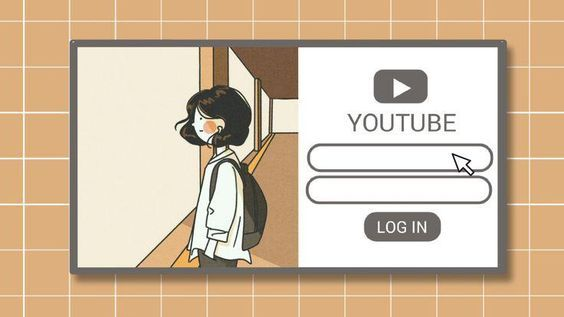

### <div style="text-align: left; background-color:#CCD488; font-family:Cursive; color:#906E07; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">🖥 About Dataset<div>
[**Dataset**](https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data)
```
YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. Owned by Google, it is the second most visited website, right after Google itself. YouTube has more than one billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.

YouTube has had an unprecedented social impact, influencing popular culture, internet trends, and creating multimillionaire celebrities. Despite all its growth and success, YouTube has been widely criticized. Criticism of YouTube includes the website being used to facilitate the spread of misinformation, copyright issues, routine violations of its users' privacy, enabling censorship, and endangering child safety and wellbeing.
```
<h2 style="color:#0B5394; font-size: 1.1em"><b>The dataset contains 7 columns:</h2> 
    
* <b>rank</b>:           rank of youtuber (sorted by subscribers)
* <b>youtuber</b>:      name of youtuber
* <b>subscribers</b>:   number of subscribers
* <b>video views</b>:   total views of video
* <b>video count</b>:   number of uploaded videos
* <b>category</b>:      category of video
* <b>started</b>:       started year 

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">1. Import Libraries<div>

In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# styling
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings("ignore")

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">2. Read Dataset<div>

In [2]:
df = pd.read_csv('../input/top-youtube-channels-data/Top YouTube Channels Data .csv')

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">3. Data cleaning<div>

In [3]:
df

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


<h2 style="color:#0B5394;font-size: 1em "><b> Handle missing values

We will explore numbers of NULL values or missing values the dataset has.

In [4]:
df.isnull().sum()

rank            0
youtuber        0
subscribers     0
video views     0
video count     5
category        0
started         0
dtype: int64

Because the 'video count' column has many missing values, I decided to drop it.

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(95, 7)

After droping the rows with missing values , the dataset has 95 rows and 7 columns to work upon.

<h2 style="color:#0B5394;font-size: 1em "><b>Convert datatype of the columns

In [7]:
df.columns

Index(['rank ', 'youtuber', 'subscribers ', 'video views ', 'video count ',
       'category ', 'started '],
      dtype='object')

* <b>Edit the names of the columns with the last space</b>

In [8]:
df.rename(columns=lambda x: x.strip() , inplace = True)
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [9]:
df.dtypes

rank             int64
youtuber        object
subscribers      int64
video views     object
video count    float64
category        object
started          int64
dtype: object

* <b>Edit data type</b>

In [10]:
df['video views']=df['video views'].str.replace(',','')
df['video views']=df['video views'].astype('int64')
df['video count']=df['video count'].astype(int)

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">4. Exploratory analysis<div>

In [11]:
df

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,188073919029,16708,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,126822520940,751,Education,2006
3,4,SET India,131000000,101541977714,78334,Shows,2006
5,6,PewDiePie,111000000,28260779633,4472,Gaming,2010
6,7,MrBeast,93900000,15417304461,721,Entertainment,2012
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,18011837263,5129,Gaming,2012
96,97,Like Nastya ESP,32600000,15144858210,584,Entertainment,2017
97,98,Ryan's World,32400000,51312603726,2155,Entertainment,2015
98,99,ABP News,32300000,9850740503,209351,People & Blogs,2012


In [12]:
df.shape

(95, 7)

In [13]:
df.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,188073919029,16708,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,126822520940,751,Education,2006
3,4,SET India,131000000,101541977714,78334,Shows,2006
5,6,PewDiePie,111000000,28260779633,4472,Gaming,2010
6,7,MrBeast,93900000,15417304461,721,Entertainment,2012


In [14]:
df.dtypes

rank            int64
youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

In [15]:
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         95 non-null     int64 
 1   youtuber     95 non-null     object
 2   subscribers  95 non-null     int64 
 3   video views  95 non-null     int64 
 4   video count  95 non-null     int64 
 5   category     95 non-null     object
 6   started      95 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.9+ KB


In [17]:
df.describe()

,rank,subscribers,video views,video count,started
count,95.000000,9.500000e+01,9.500000e+01,95.000000,95.000000
mean,52.021053,5.123263e+07,2.767061e+10,15847.221053,2010.663158
std,28.246250,2.640947e+07,2.628749e+10,40955.200388,5.612696
min,1.000000,3.220000e+07,2.647950e+09,45.000000,1970.000000
25%,28.500000,3.620000e+07,1.456406e+10,393.500000,2007.000000
50%,52.000000,4.270000e+07,2.088142e+10,1139.000000,2011.000000
75%,75.500000,5.545000e+07,2.814759e+10,4986.000000,2014.000000
max,100.000000,2.130000e+08,1.880739e+11,209351.000000,2018.000000


In [18]:
df.nunique()

rank           95
youtuber       95
subscribers    81
video views    95
video count    95
category       13
started        15
dtype: int64

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">5. Data visualization<div>

<h2 style="color:#0B5394;font-size: 1em "><b>Getting unique values of each category

In [19]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [20]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'category', 'started'}}

multi_table([nunique_df['category'],nunique_df['started']])

,category
Music,33
Entertainment,19
People & Blogs,10
Gaming,7
Education,6
Shows,4
Film & Animation,4
Comedy,4
Sports,2
How to & Style,2


 <h2 style="color:#0B5394;font-size: 1em "><b> Categories of Youtube Channel

In [21]:
categories=df['category'].value_counts()
fig=px.pie(values=categories.values,
          names=categories.index,
          color_discrete_sequence=px.colors.sequential.RdBu,
          title="Categories of Youtube Channels", template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.show();

 <h2 style="color:#0B5394;font-size: 1em "><b> Started year of youtube channels

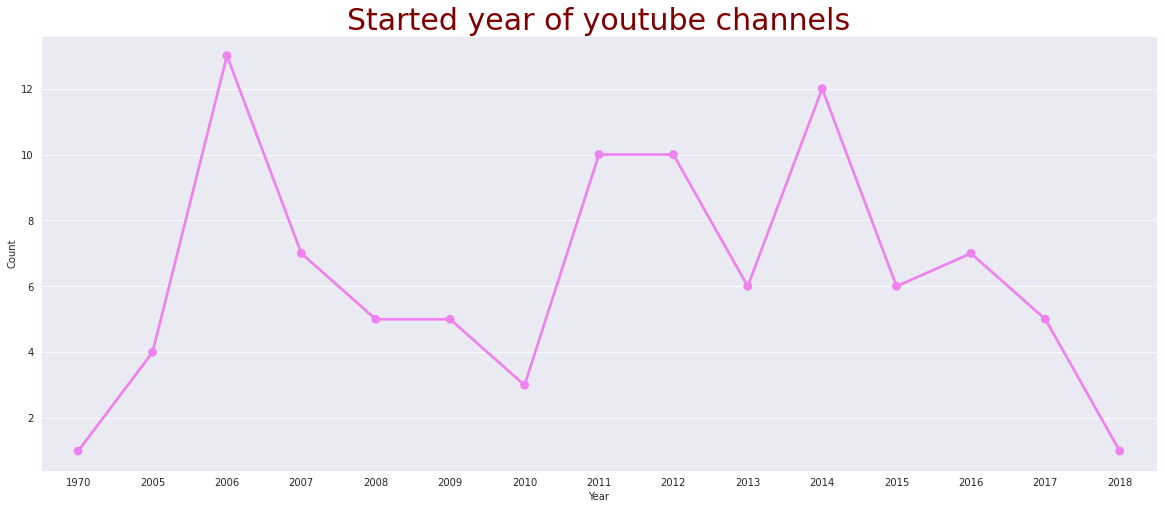

In [22]:
year=df['started'].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index,y=year.values, color='violet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Started year of youtube channels',size=30, color='maroon');

<h2 style="color:#0B5394;font-size: 1em "><b>Mean subscribers, video views and vido count of all youtube channels year by year

In [23]:
year_mean=df.groupby('started').mean().reset_index()
year_mean

,started,rank,subscribers,video views,video count
0,1970,94.000000,3.290000e+07,2.647950e+09,483.000000
1,2005,59.250000,4.327500e+07,1.804990e+10,16044.000000
2,2006,44.461538,6.942308e+07,5.306097e+10,12313.769231
3,2007,32.857143,5.871429e+07,3.730683e+10,17767.142857
4,2008,51.600000,4.632000e+07,3.109270e+10,52155.600000
5,2009,47.400000,4.698000e+07,1.704113e+10,72447.800000
6,2010,33.333333,6.913333e+07,2.264074e+10,4085.000000
7,2011,55.000000,4.303000e+07,2.302828e+10,3141.800000
8,2012,51.300000,5.153000e+07,1.866820e+10,29257.500000
9,2013,51.166667,4.438333e+07,1.664049e+10,21082.333333


In [24]:
def pltplot(data, xcol, ycol, color, ax, title):
    sns.pointplot(data=data, x=xcol, y=ycol, color=color, ax=ax).set_title(title, size=10)
    

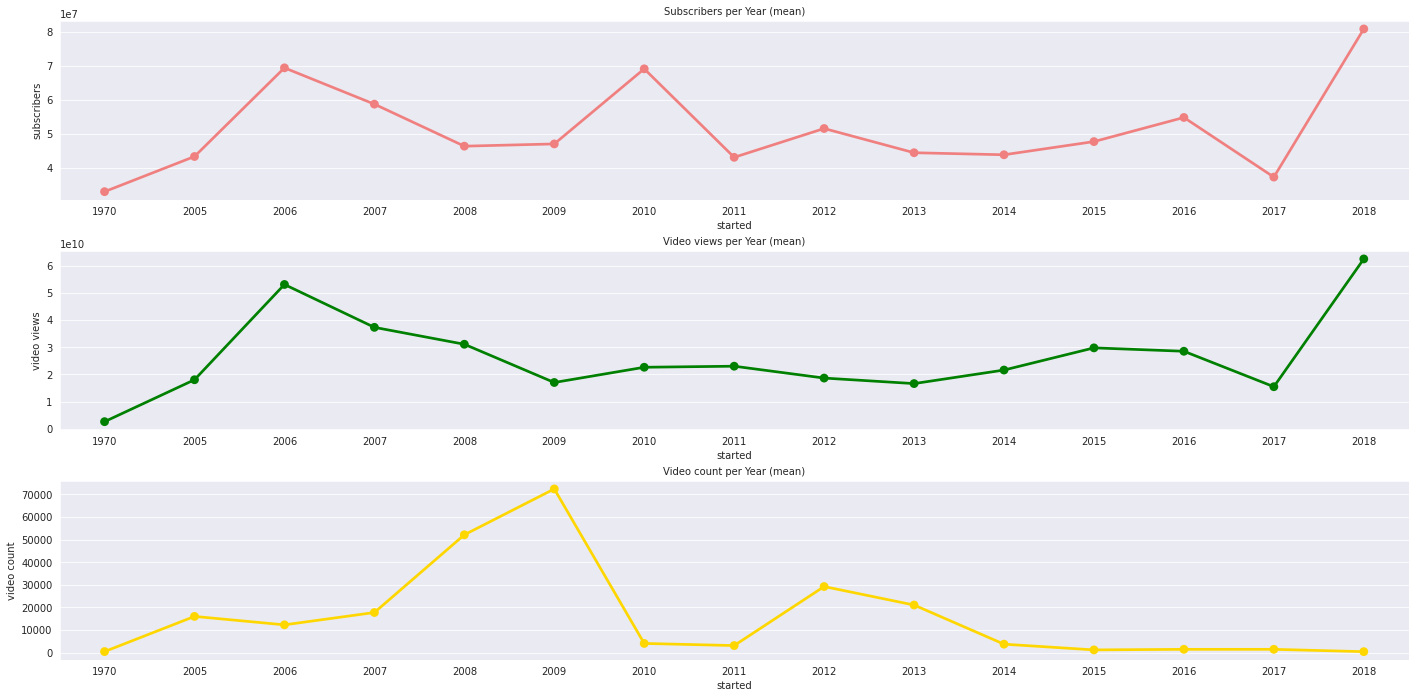

In [25]:
fig, ((ax1),(ax2),(ax3))=plt.subplots(ncols=1, nrows=3)
fig.set_size_inches(20,10)
fig.tight_layout(pad=3.0)

pltplot(year_mean,'started','subscribers','lightcoral', ax1,'Subscribers per Year (mean)')
pltplot(year_mean,'started','video views','green', ax2,'Video views per Year (mean)')
pltplot(year_mean,'started','video count','gold', ax3,'Video count per Year (mean)')

 <h2 style="color:#0B5394;font-size: 1em "><b> Top 5 Categories that have subscribers

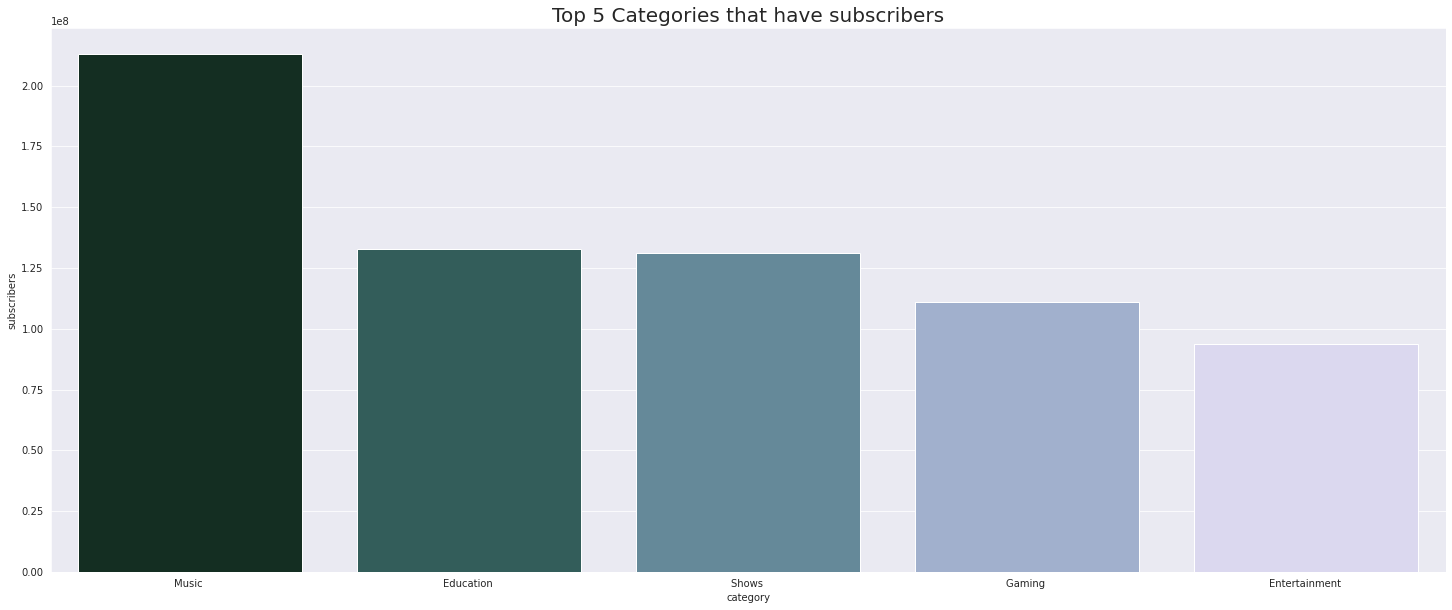

In [26]:
subscribers=df.sort_values('subscribers',ascending=False)
plt.figure(figsize=(25,10))
subscribers=subscribers[:5]
sns.barplot(x="category",
           y="subscribers",
           data=subscribers,
           palette="ch:20_r")
plt.title('Top 5 Categories that have subscribers',size=20);

 <h2 style="color:#0B5394;font-size: 1em "><b> Top 5 Categories that have Video Views

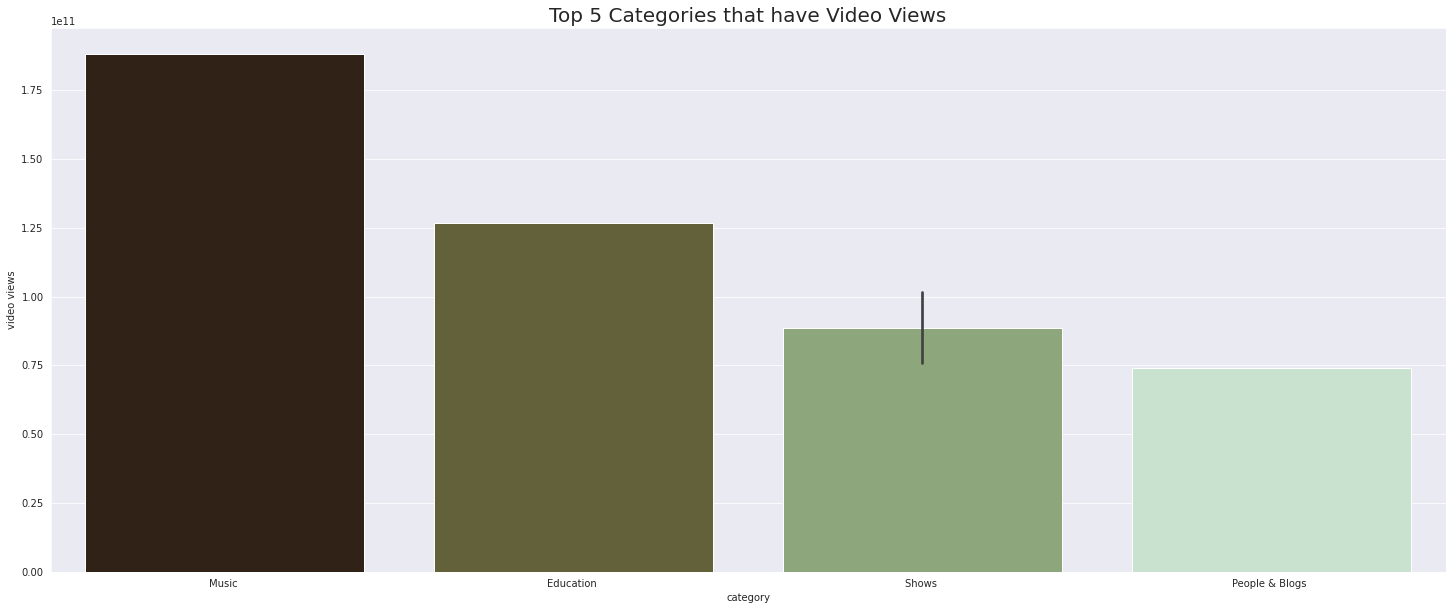

In [27]:
videoviews=df.sort_values('video views',ascending=False)
plt.figure(figsize=(25,10))
videoviews=videoviews[:5]
sns.barplot(x="category",
           y="video views",
           data=videoviews,
           palette="ch:40_r")
plt.title('Top 5 Categories that have Video Views',size=20);

 <h2 style="color:#0B5394;font-size: 1em "><b> Top 5 Categories that have Video Counts

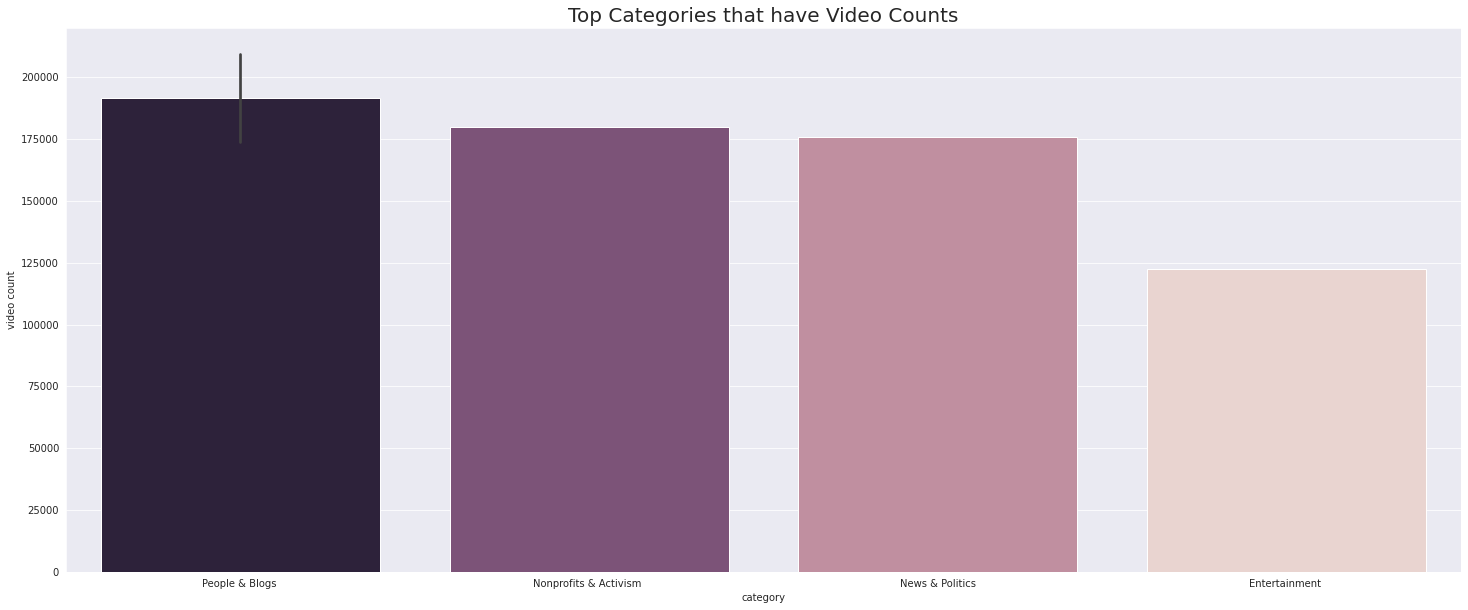

In [28]:
videocount=df.sort_values('video count',ascending=False)
plt.figure(figsize=(25,10))
videocount=videocount[:5]
sns.barplot(x="category",
           y="video count",
           data=videocount,
           palette="ch:30_r")
plt.title('Top Categories that have Video Counts',size=20);

In [29]:
def plot(data, xcol, ycol, size, color,title):
    px.scatter(data, x=xcol,y=ycol,
               size=size, color=color,
               log_x=True, size_max=50).set_title(title,fontsize=20)
    axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title1 = 'categories with video views and subscribers'
title2 = 'categories with video views and video counts'


 <h2 style="color:#0B5394;font-size: 1em "><b>Categories with Video views and Subscribers

In [30]:
fig = px.scatter(df, x="subscribers", y="video views",
                 size="video views", color="category",
                 log_x=True, size_max=50,
                 title="Categories with Video views and Subscribers",
                 marginal_y='rug')
fig.show()

 <h2 style="color:#0B5394;font-size: 1em "><b>Categories with Video views and Video count

In [31]:
fig = px.scatter(df, x="video count", y="video views",
                 size="video views", color="category",
                 log_x=True, size_max=50,
                 title="Categories with Video views and Video count",
                 marginal_y='rug')
fig.show()

 <h2 style="color:#0B5394;font-size: 1em "><b>Relation between Category and Youtuber

In [32]:
fig=px.sunburst(df, path=['category','youtuber'])
fig.show()

 <h2 style="color:#0B5394;font-size: 1em "><b> Pair plot

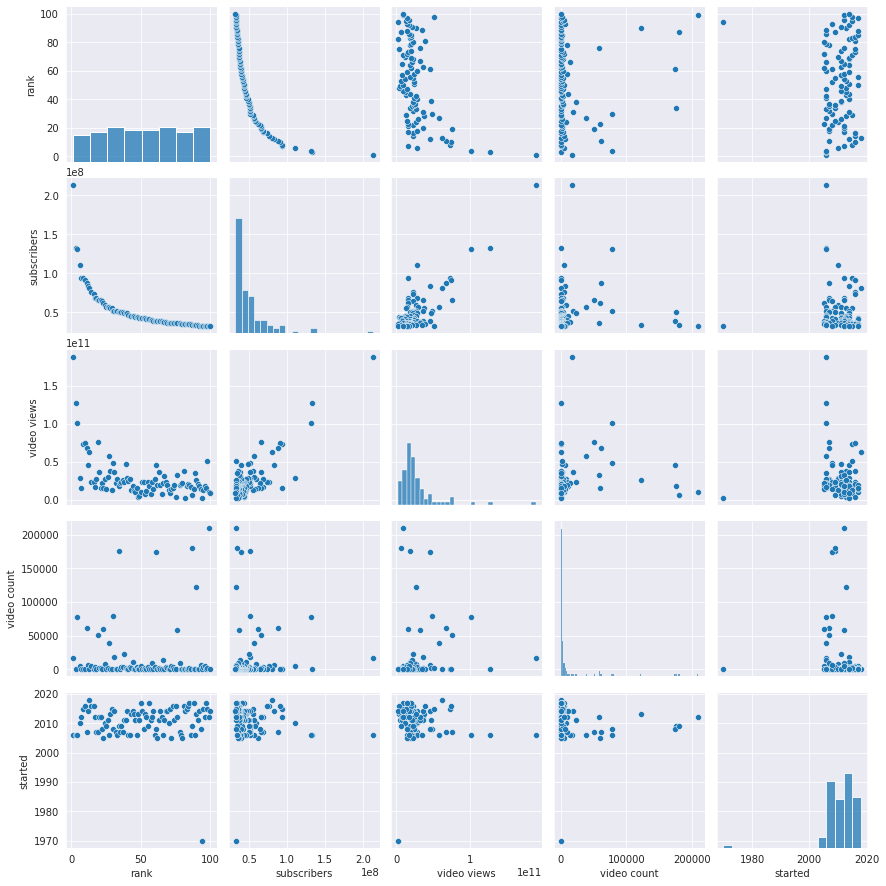

In [33]:
sns.pairplot(df)
sns.set_theme('notebook')
plt.show();

 <h2 style="color:#0B5394;font-size: 1em "><b> 
The heat chart depicts the correlation

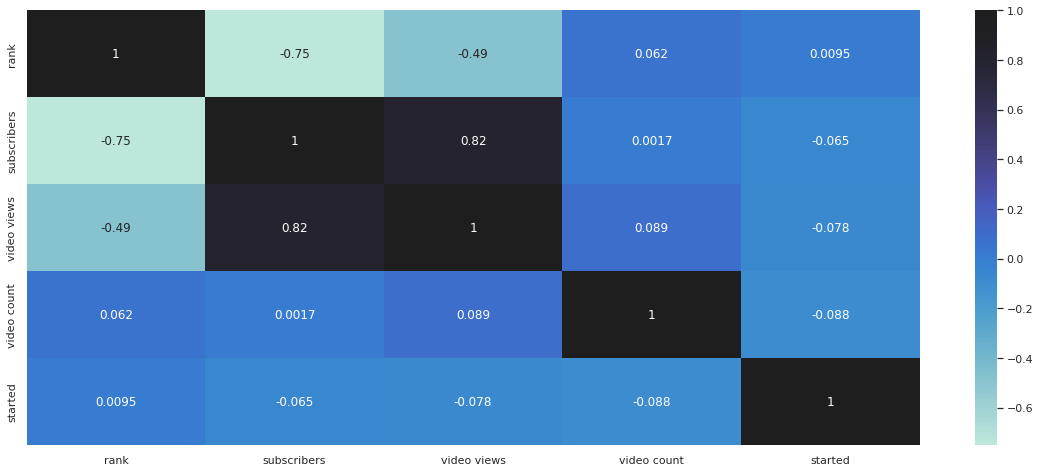

In [34]:
plt.figure(figsize=(20,8))
sns.set_theme('notebook')
sns.heatmap(df.corr(), annot=True, center=True);

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">6. Authors Message<div>

If you find this helpful, I would really appreciate the upvote! If you see something wrong please let me know. And lastly Im happy to hear your thoughts about the notebook for me to also improve!

### <div style="text-align: left; background-color: #A0D992; font-family:Cursive; color: #125E12; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em">---------------🙇Thanks For Watching!------------------<div>